<h1 style = "text-align: center;">Chance of a Purchase in Online Shopping</h1>

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error

from joblib import dump

In [6]:
import os
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_dir = "./drive/My Drive/Colab Notebooks/" 
else:
  base_dir = "." 

<h2>I. Data Engineering</h2>

<h3>a. Data Cleaning</h3>

<p style="color:blue; font-style:italic;">We will use the pandas library:</p>
<ul style="color:blue; font-style:italic;">
  <li>to read the dataset from the csv file into what pandas calls a DataFrame;</li>
  <li>to explore the dataset: looking at values and computing summary statistics.</li>
</ul>

In [7]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(os.path.join(base_dir, "dataset_shopping.csv"))

# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

<p style="color:blue; font-style:italic;">The dataset contains 12330 records about online shopping sessions, each having 18 features.</p>

In [8]:
# The dimensions
df.shape

(12330, 18)

In [9]:
# The columns, their datatypes and whether there are nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin_num_pages   12330 non-null  int64  
 1   admin_duration    12330 non-null  float64
 2   info_num_pages    12330 non-null  int64  
 3   info_duration     12330 non-null  float64
 4   prod_num_pages    12330 non-null  int64  
 5   prod_duration     12330 non-null  float64
 6   bounce_rate       12330 non-null  float64
 7   exit_rate         12330 non-null  float64
 8   page_value        12330 non-null  float64
 9   special_day       12330 non-null  float64
 10  month             12330 non-null  object 
 11  operating_system  12330 non-null  int64  
 12  browser           12330 non-null  int64  
 13  region            12330 non-null  int64  
 14  referrer          12330 non-null  int64  
 15  visitor           12330 non-null  object 
 16  weekend           12330 non-null  bool  

In [10]:
# The columns, their datatypes and whether there are nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin_num_pages   12330 non-null  int64  
 1   admin_duration    12330 non-null  float64
 2   info_num_pages    12330 non-null  int64  
 3   info_duration     12330 non-null  float64
 4   prod_num_pages    12330 non-null  int64  
 5   prod_duration     12330 non-null  float64
 6   bounce_rate       12330 non-null  float64
 7   exit_rate         12330 non-null  float64
 8   page_value        12330 non-null  float64
 9   special_day       12330 non-null  float64
 10  month             12330 non-null  object 
 11  operating_system  12330 non-null  int64  
 12  browser           12330 non-null  int64  
 13  region            12330 non-null  int64  
 14  referrer          12330 non-null  int64  
 15  visitor           12330 non-null  object 
 16  weekend           12330 non-null  bool  

<li style = "color:blue; font-style: italic;">Let's note that our dataset has 12330 examples and each column has 12330 non-null values. Therefore, <b>we don't have to deal with missing values</b>.</pli>
<li style = "color:blue; font-style: italic;">The type of data that is stored in the records is automatically extracted from a log file; therefore, <b>the data cannot have been wrongly typed</b>.</pli>

<p style = "color:blue; font-style: italic;">Split the features into numeric and nominal ones.</p>

In [11]:
features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration", "prod_num_pages", "prod_duration", "bounce_rate", "exit_rate", "page_value", "special_day", "month", "operating_system", "browser", "region", "referrer", "visitor", "weekend"]
numeric_features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration", "prod_num_pages", "prod_duration", "bounce_rate", "exit_rate", "page_value", "special_day", "operating_system", "browser", "region", "referrer", "weekend"]
nominal_features = ["month","visitor"]

<p style = "color:blue; font-style: italic;">Data analysis to identify any potential noisy records in the dataset.</p>

In [12]:
# Summary statistics
df.describe(include="all")

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [13]:
df.head()

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
0,0,0.0,0,0.0,1,0.000000,0.2,0.200000,0.0,0.0,May,1,1,7,2,Returning_Visitor,True,False
1,0,0.0,0,0.0,1,0.000000,0.2,0.200000,0.0,0.0,Feb,1,1,3,4,Returning_Visitor,True,False
2,0,0.0,0,0.0,5,0.000000,0.2,0.200000,0.0,0.0,May,3,2,6,13,Returning_Visitor,False,False
3,5,41.3,0,0.0,24,446.927778,0.0,0.008602,0.0,1.0,Feb,2,2,8,1,Returning_Visitor,True,False
4,2,19.0,0,0.0,11,658.916667,0.0,0.015385,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


<p style="color:blue; font-style:italic;">It can be observed that: </p>
<ul style="color:blue; font-style:italic;">
  <li>From a total of 12330 examples, 10442 of results are FALSE => <b>84.68% of the outcomes are negative</b>.</li>
</ul>

<p style = "color:blue; font-style: italic;">If the user did not visit any admin pages (admin_num_pages = 0), the time spend on admin pages should be 0 (admin_duration = 0). If this does not happen, correct that examples, by setting time to 0. The same rule for the pages releted to information (info_num_pages -> info_duration) or to pages with similar products (prod_num_pages -> prod_duration). (This check was done before realizing that the data comes from a log file)</p>

In [14]:
sum_wrong_admin_duration = df[(df['admin_num_pages'] == 0) & (df['admin_duration'] > 0)]['admin_duration'].sum()
print("The sum of the amount of time spend on administrative pages where admin_num_pages=0: ", sum_wrong_admin_duration)

The sum of the amount of time spend on administrative pages where admin_num_pages=0:  0.0


In [15]:
sum_wrong_info_duration = df[(df['info_num_pages'] == 0) & (df['info_duration'] > 0)]['info_duration'].sum()
print("The sum of the amount of time spend on information pages where info_num_pages=0: ", sum_wrong_info_duration)

The sum of the amount of time spend on information pages where info_num_pages=0:  0.0


In [16]:
sum_wrong_prod_duration = df[(df['prod_num_pages'] == 0) & (df['prod_duration'] > 0)]['prod_duration'].sum()
print("The sum of the amount of time spend on information pages where prod_num_pages=0: ", sum_wrong_prod_duration)

The sum of the amount of time spend on information pages where prod_num_pages=0:  0.0


<h3>b. Dataset Exploration</h3>

In [17]:
copy_df = df.copy()

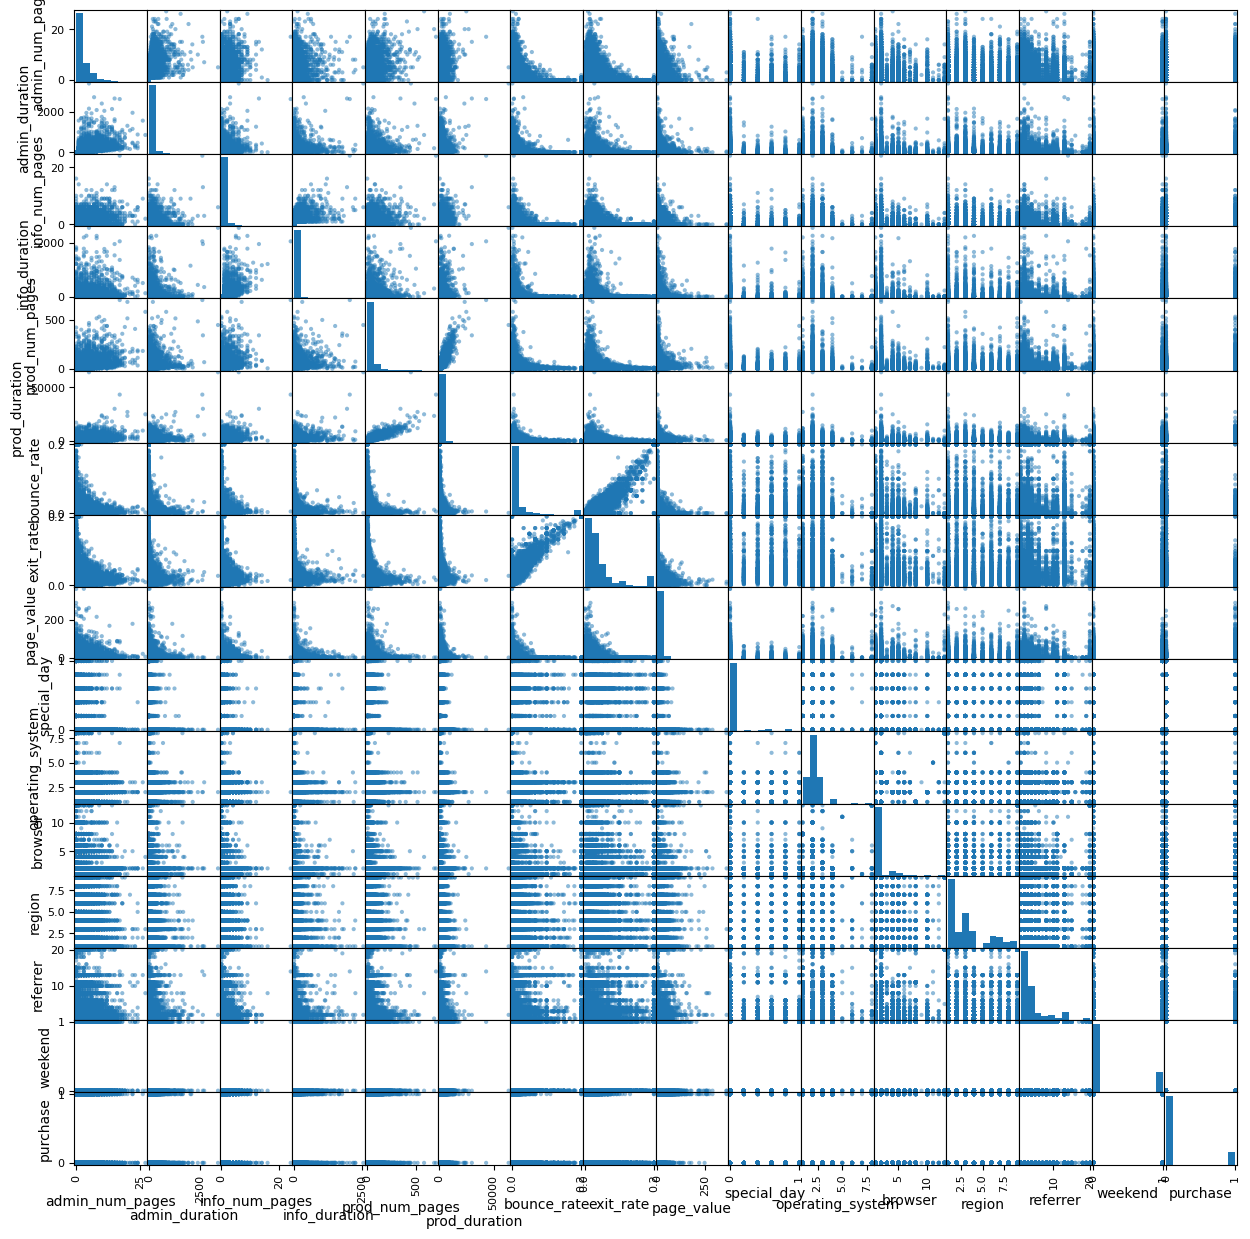

In [18]:
# Convert boolean columns to integers (0 and 1)
boolean_columns = copy_df.select_dtypes(include=[bool]).columns
copy_df[boolean_columns] = copy_df[boolean_columns].astype(int)

# Generate the scatter matrix
m = scatter_matrix(copy_df, figsize=(15, 15))

<p style = "color:blue; font-style: italic;">Compute correlations between numeric-valued columns and show this as a heatmap.</p>

<Axes: >

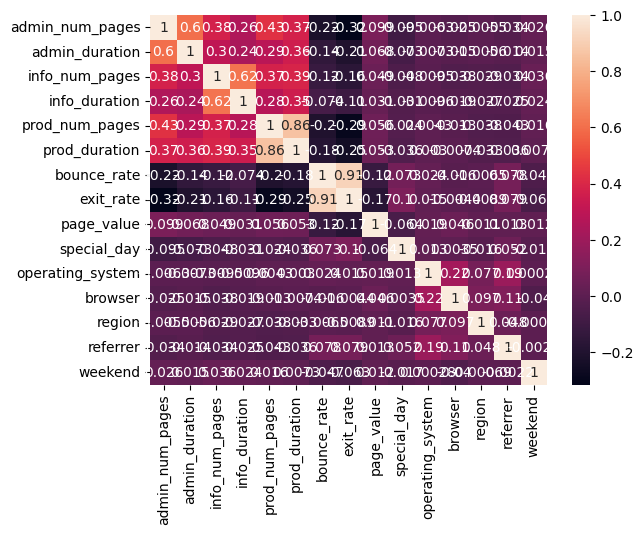

In [19]:
heatmap(copy_df[numeric_features].corr(), annot=True)

<p style="color:blue; font-style:italic;">Based on the Heatmap, it can be observed that: </p>
<ul style="color:blue; font-style:italic;">
  <li>The correlation between 'bounce_rate' and 'exit_rate' is very high (0.91). This can also be seen in the scatter matrix (they are linearly dependent)</li>
  <li>The correlations between 'admin_num_pages'->'admin_duration', info_num_pages -> info_duration, prod_num_pages -> prod_duration are high (this was also discussed at Data Cleaning for the case when admin_num_pages=0).</li>
  <li>The exit_rate and bounce_rate are quite predictive of purchase (purchase is true if and only if exit_rate<0.150 and bounce_rate<0.125). Let's scatter again the plot for a better visualization.</li>


<h3>d. Impute/Replace Values</h3>

<h4 style="color:blue; font-style:italic;">Time spend on product realted pages (prod_duration)</h4>

<p style="color:blue; font-style:italic;">The maximum value for prod_duration is 63973.522230 seconds, which means approximately <b>17.77 hours for an online shopping session</b>. It is unlikely for a session to last that long. Most probably, the user left the computer while still logged in for various reasons. If they left the computer, it is also very unlikely that they made any purchase. Let's set the maximum period for a session to 4.17 hours or 15000 seconds. Correct all instances that exceed 8 hours by imputing an appropriate value</p>

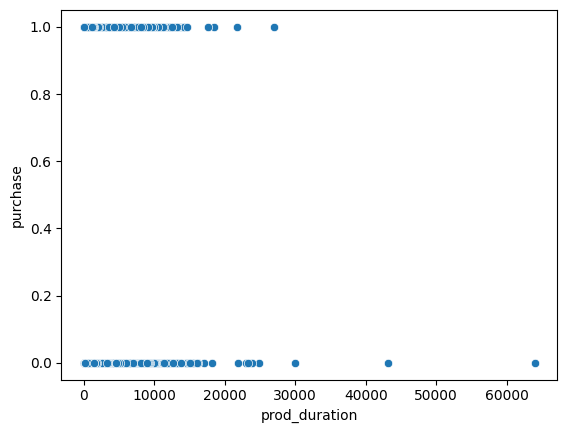

In [20]:
plot = scatterplot(x="prod_duration", y="purchase", data=df)

In [21]:
df[(df["prod_duration"] > 15000)]

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
454,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
1437,15,2657.318056,13,1949.166667,343,29970.46597,0.005316,0.028971,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
2651,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
3203,11,631.416667,5,1037.150000,501,21672.24425,0.003965,0.014292,9.131387,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
4048,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
4606,0,0.000000,6,77.958333,423,17086.23424,0.006294,0.021599,0.252722,0.0,Nov,2,2,7,1,Returning_Visitor,True,False
5561,10,1251.200000,7,250.000000,414,23888.81000,0.009900,0.027062,1.033757,0.0,Sep,2,2,4,13,Returning_Visitor,False,False
5759,10,2407.423810,3,434.300000,486,23050.10414,0.000324,0.011249,0.000000,0.0,Jul,2,2,1,3,Returning_Visitor,False,False
5802,11,383.300000,2,256.300000,189,15454.43857,0.007286,0.019883,0.000000,0.0,Aug,2,10,2,1,Returning_Visitor,False,False
6627,20,1307.675000,3,132.666667,517,27009.85943,0.004385,0.014594,8.403164,0.0,Nov,1,1,1,2,Returning_Visitor,False,True


<p style="color:blue; font-style:italic;">Replace the prod_duration value with the value of the average 'prod_duration' when no purchase is made. This way, we can keep the record (which has valuable data for the other features) <b>without throwing away data and without being noisy in the computations related to the modeling function</b>.</p>

<p style="color:blue; font-style:italic;">We can also observe that the dataset has only 3 sessions where the time exceeded 8h and NO purchase was made.</p>

In [22]:
avg_prod_duration_no_purchase = df[(df['purchase'] == 0) & (df['prod_duration'] <= 15000)]['prod_duration'].mean()
#df.loc[df['prod_duration'] > 15000, 'prod_duration'] = avg_prod_duration_no_purchase

<p style="color:blue; font-style:italic;">I have commented out the above replacement because the Linear Regression did not converge with this modification (although KNN performed better than it does now.)</p>

<h4 style="color:blue; font-style:italic;">Time spend on administrative realted pages (admin_duration)</h4>

In [23]:
df[(df["admin_duration"] > 15000)]

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase


<h4 style="color:blue; font-style:italic;">Time spend on information realted pages (info_duration)</h4>

In [24]:
df[(df["info_duration"] > 15000)]

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase


<h3>e. Feature Engineering</h3>

<p style="color:blue; font-style:italic;">It can be observed that exit_rate and admin_num_pages are inversly proprotional. Increasing the exit_rate leads to a lower chance of purchase while increasing admin_num_pages leads to a higher chance of purchase. Let's try all combinations: admin_num+pages->exit_rate; info_num_pages -> exit_rate; info_num_pages -> bounce_rate; admin_num_pages -> bounce_rate", data=df</p>

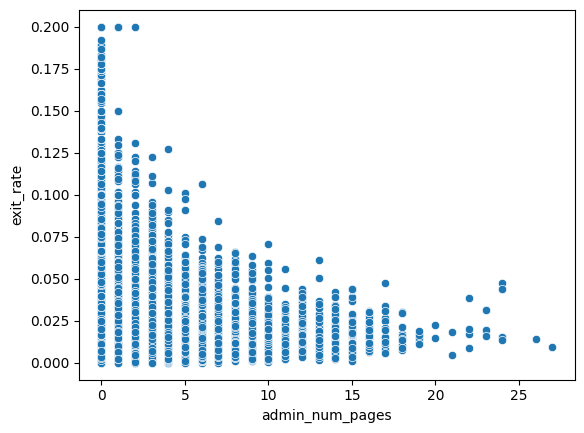

In [25]:
plot = scatterplot(x="admin_num_pages", y="exit_rate", data=df)

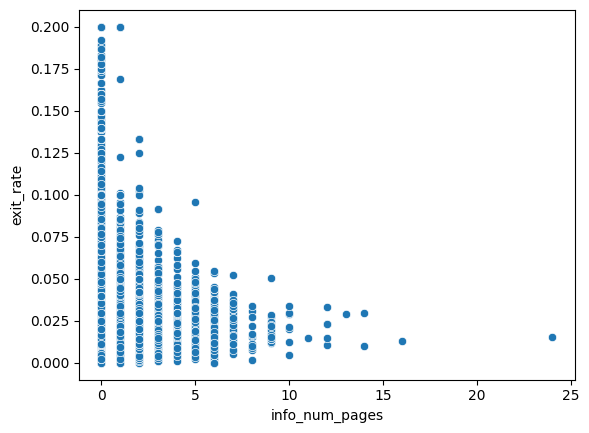

In [26]:
plot = scatterplot(x="info_num_pages", y="exit_rate", data=df)

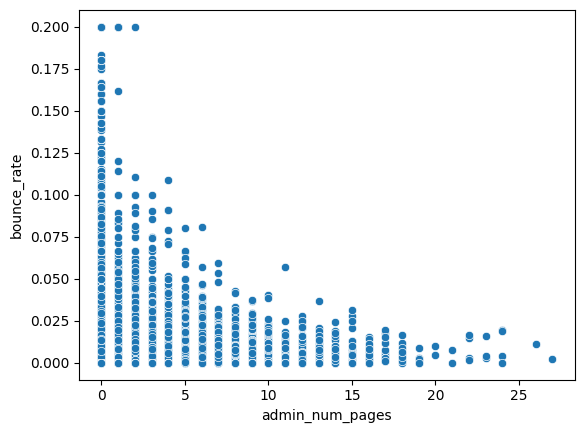

In [27]:
plot = scatterplot(x="admin_num_pages", y="bounce_rate", data=df)

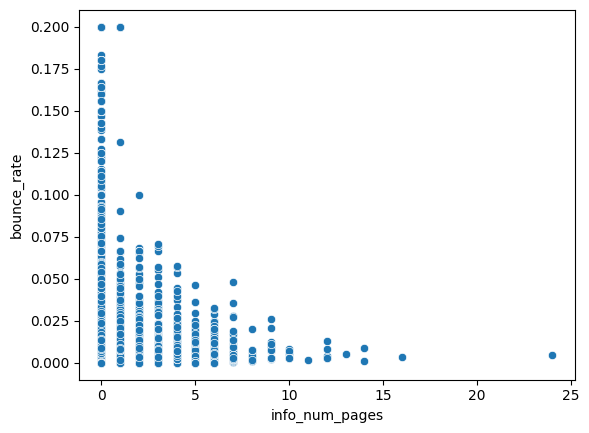

In [28]:
plot = scatterplot(x="info_num_pages", y="bounce_rate", data=df)

In [29]:
class InsertCombinationFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["combination_4features"] = X["admin_num_pages"] * X["info_num_pages"] / ( X["exit_rate"] * X["bounce_rate"] + 1)
    
            pd.set_option('future.no_silent_downcasting', True)
        return X
    
    def get_params(self, deep=True):
        return {"insert": self.insert}

<h4 style="color:blue; font-style:italic;">Exit_rate and bounce_rate</h4>

<p style="color:blue; font-style:italic;">Both exit_rate and bounce_rate are predictive for the purchase, but they are linearly dependent. We can create a feature which is the product of them, and then drop them.</p>

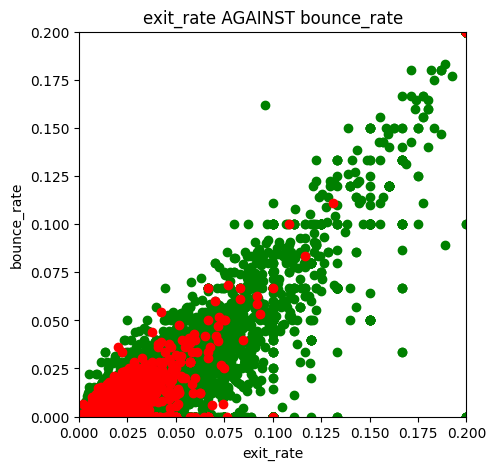

In [30]:
# Plot two of the features and the class label

exit_rate = df["exit_rate"]
bounce_rate = df["bounce_rate"]
y = df["purchase"]

fig = plt.figure(figsize=(5,5))
plt.title("exit_rate AGAINST bounce_rate")
plt.scatter(exit_rate[y==0], bounce_rate[y==0], color = "green")
plt.scatter(exit_rate[y==1], bounce_rate[y==1], color = "red")
plt.xlabel("exit_rate")
plt.xlim(0, 0.2)
plt.ylabel("bounce_rate")
plt.ylim(0, 0.2)
plt.show()

In [31]:
class InsertBounceExitRate(BaseEstimator, TransformerMixin):
    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["bounce_exit"] = X["exit_rate"] * X["bounce_rate"] 
            
            #X.drop(["exit_rate", "bounce_rate"], axis=1, inplace=True)
    
            # Set the pandas option correctly aligned
            pd.set_option('future.no_silent_downcasting', True)
        return X

    def get_params(self, deep=True):
        return {"insert": self.insert}

<h3><i>Create a Test Set</i></h3>

<p style="color:blue; font-style:italic;">Split the dataset into two parts:</p>

<ul style="color:blue; font-style:italic;">
  <li>Develpoment Set - 80%</li>
  <li>Test Set - 20%</li>
</ul>
<p style="color:blue; font-style:italic;"> Everything we do until our final error estimation will be done on the development part of the dataset. From now on, we won't look at the test set.</p>

<p style="color:blue; font-style:italic;">In stratification, the proportion of examples of each class in the overall dataset is respected in the partitioning into training and validation/test sets. </p>

In [57]:
# Split off the test set: 20% of the dataset. Note the stratification
dev_df, test_df = train_test_split(df, train_size=0.8, stratify=df["purchase"], random_state=2)

<h3>f. Data preprocessing</h3>

In [33]:
class ScalerSelector(BaseEstimator, TransformerMixin):

    def __init__(self, scaler=None):
        self.scaler = scaler
        
    def fit(self, X, y=None):
        if self.scaler:
            self.scaler.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.scaler:
            return self.scaler.transform(X)
        else:
            return X

In [34]:
# Create the preprocessor
preprocessor = ColumnTransformer([   
        ("num", Pipeline([("combination_features", InsertCombinationFeatures()),
                          ("bounce_exit", InsertBounceExitRate()),
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", ScalerSelector())]),  
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore", sparse_output=False))]), 
                nominal_features)],
        remainder="drop")

<h2>II. Modeling</h2>

In [35]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features]
test_X = test_df[features]

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
label_encoder.fit(df["purchase"])
dev_y = label_encoder.transform(dev_df["purchase"])
test_y = label_encoder.transform(test_df["purchase"])

<p style="color:blue; font-style:italic;"> Let's see how a majority-class classifier performs. This is our baseline. We need to do better than this!</p>

In [36]:
maj = DummyClassifier()
maj.fit(dev_X, dev_y)
accuracy_score(test_y, maj.predict(test_X))

0.8450932684509327

<h3 style="color:blue; font-style:italic;">$k$-Fold Cross Validation</h3>

<p style="color:blue; font-style:italic;">Our dataset is not very small (it has 12330 examples), so the first intuition would be to use <b>Hold Out Method</b>, which has as advantage tha fact that the test error is independent of the training set. But, we also have to take into account that 84.68% of the examples are negative. Therefore, if we succeivly devide our dataset into many parts (training - validation -testing), some of them might have underrepresented positive examples. </p>

In [37]:
# Create the object that shuffles & splits the data
kf = KFold(n_splits=10, shuffle=True, random_state=2)

<h4 style="color:red; font-style:italic;">Method 1: <u> K-Nearest Neighbors (KNN) -  Weighted Average </u></43>

<p style="color:blue; font-style:italic;">A variation of the KNN model was implemented, where the target value is computed as a <b>weighted average</b> of the 10 nearest neighbors. Both classical KNN and weighted KNN approaches were tested, but the weighted version performed slightly better. To determine the optimal value for k and get the best predictions, <b>Grid Search</b> was used.</p>

<h5>a. Error Estimation & Model Selection</h5>

In [38]:
def KNN_WeightedAverage(preprocessor, kf, dev_X, dev_y):
    # Create a pipeline that combines the preprocessor with kNN
    knn = Pipeline([
        ("preprocessor", preprocessor),
        ("predictor", KNeighborsClassifier(weights="distance"))])

    knn_param_grid = {
                      "predictor__n_neighbors": [ 7, 8, 9, 10, 11, 12, 13, 14, 15],
                      "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
                      "preprocessor__num__combination_features__insert": [True, False],
                      "preprocessor__num__bounce_exit__insert": [True, False] }

    # Create the grid search object which will find the best hyperparameter values based on validation error
    knn_gs = GridSearchCV(knn, knn_param_grid, scoring="accuracy", cv=kf, refit=True)

    # Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
    knn_gs.fit(dev_X, dev_y)

    # Let's see how well we did
    return knn, knn_gs.best_params_, knn_gs.best_score_


In [39]:
knn_model, best_params, best_score = KNN_WeightedAverage(preprocessor, kf, dev_X, dev_y)
print(best_params, best_score)

{'predictor__n_neighbors': 13, 'preprocessor__num__bounce_exit__insert': True, 'preprocessor__num__combination_features__insert': False, 'preprocessor__num__scaler': RobustScaler()} 0.8912213748301963


<p style="color:blue; font-style:italic;">We can check for under/overfitting.</p>

In [40]:
knn_model.set_params(**best_params) 
scores = cross_validate(knn_model, dev_X, dev_y, cv=kf, 
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(scores["train_score"]))
print("Validation accuracy: ", np.mean(scores["test_score"]))

Training accuracy:  1.0
Validation accuracy:  0.8912213748301963


<h5>b. Training</h5>

In [41]:
# Re-train knn on train+validation 
knn_model.fit(dev_X, dev_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('combination_features',
                                                                   InsertCombinationFeatures(insert=False)),
                                                                  ('bounce_exit',
                                                                   InsertBounceExitRate()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['admin_num_pages',
                                                   'admin_duration',
                                                   'info_num_pages',
                                                   'info_duration',
                                                   'prod_num_pages',
                                                   'prod_duration',
                                                   '...ate', 'exit_rate',
                                                   'page_value', 'special_day',
                                                   'operating_system',
                                                   'browser', 'region',
                                                   'referrer', 'weekend']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binarizer',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['month', 'visitor'])])),
                ('predictor',
                 KNeighborsClassifier(n_neighbors=13, weights='distance'))])

<h5>c. Evaluation</h5>

In [42]:
#Test on the Test Set
accuracy_score(test_y, knn_model.predict(test_X))

0.8815896188158961

<p style="color:blue; font-style:italic;">My implementation of KNN may have leakages (accuracy 100% on the training set) and overfits a lot!</p>

<h4 style="color:red; font-style:italic;">Method 2: <u>Logistic Regression</u></h4>

<p style="color:blue; font-style:italic;"> For regularization, we penalize by the l1-norm. The grid search is simpler than in the case of knn, to improve the compilation time.</p>

<h5>a. Error Estimation & Model Selection</h5>

In [43]:
def LogisticReg(preprocessor, kf, dev_X, dev_y):
    # Create a pipeline that combines the preprocessor with logistic regression
    logistic = Pipeline([
        ("preprocessor", preprocessor),
        ("predictor", LogisticRegression(penalty="l1", solver="liblinear", max_iter=2000))]) 

    # Create a dictionary of hyperparameters for logistic regression
    logistic_param_grid = {"predictor__C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                      "preprocessor__num__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
                      "preprocessor__num__combination_features__insert": [True, False],
                      "preprocessor__num__bounce_exit__insert": [True, False] }


    # Create the grid search object which will find the best hyperparameter values based on validation error
    logistic_gs = GridSearchCV(logistic, logistic_param_grid, scoring="accuracy", cv=kf, refit=True)

    # Run grid search by calling fit. It will also re-train on train + validation using the best parameters
    logistic_gs.fit(dev_X, dev_y)

    return logistic, logistic_gs.best_params_, logistic_gs.best_score_

In [44]:
logistic_model, best_params, best_score = LogisticReg(preprocessor, kf, dev_X, dev_y)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'predictor__C': 0.0001, 'preprocessor__num__bounce_exit__insert': False, 'preprocessor__num__combination_features__insert': True, 'preprocessor__num__scaler': RobustScaler()}
Best Score: 0.8858482791502515


<h5>b. Training</h5>

In [45]:
logistic_model.fit(dev_X, dev_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('combination_features',
                                                                   InsertCombinationFeatures(insert=False)),
                                                                  ('bounce_exit',
                                                                   InsertBounceExitRate()),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['admin_num_pages',
                                                   'admin_duration',
                                                   'info_num_pages',
                                                   'info_duration',
                                                   'prod_num_pages',
                                                   'prod_duration',
                                                   '..._rate',
                                                   'page_value', 'special_day',
                                                   'operating_system',
                                                   'browser', 'region',
                                                   'referrer', 'weekend']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('binarizer',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['month', 'visitor'])])),
                ('predictor',
                 LogisticRegression(max_iter=2000, penalty='l1',
                                    solver='liblinear'))])

<p style="color:blue; font-style:italic;">Logistic Regression does not overfit.</p>

In [46]:
logistic_model.set_params(**best_params) 
scores = cross_validate(logistic_model, dev_X, dev_y, cv=kf, 
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(scores["train_score"]))
print("Validation accuracy: ", np.mean(scores["test_score"]))

Training accuracy:  0.88568982979141
Validation accuracy:  0.8858482791502515


<h5>c. Evaluation</h5>

In [47]:
#Test on the Test Set
accuracy_score(test_y, logistic_model.predict(test_X))

0.8872668288726683

<p style="color:blue; font-style:italic;">Both KNN and Logistic Regression are better than our baseline (84%). Logistic Regression (88.72%) is slightly better than knn (88.15%) and it also does not overfit, unlike knn. So we will go further with Logistic Regression.</p>

<h4 style="color:red; font-style:italic;">Method 3: <u>Hybrid Model: Logistic Regression & KNN<u></h4>

<p style="color:blue; font-style:italic;">The overall performance was slightly better in the case of Logistic Regression than in the case of k-NN. But let's take into account that Logistic Regression works better for models that are linear. In the Data Visualization part, it could be seen that some features are not linearly correlated to the outcome. Thefore, I will try a hybridised version of Linear Regression. If the distance between an example from the test set and one from the training is very small (they are very similar), the model switches to k-NN.</p>

In [48]:
def euc(x, xprime):
    return np.sqrt(np.sum((x - xprime)**2))

def find_smallest_distance(x, X):
    
    # Find which example in X is the most similar to x
    distance = np.min([euc(x, xprime) for xprime in X])
    
    # Return the corresponding distance value from y
    return distance


In [49]:
def predict_with_combined_model(test_X, test_y, dev_X, knn_model, logistic_model, alpha):
    correct_predictions = 0

    dev_X_transformed = preprocessor.transform(dev_X)

    prediction_logistic = logistic_model.predict(test_X)
    prediction_knn = knn_model.predict(test_X)

    row = 0
    
    # Iterate over the rows of the DataFrame
    for i, x in test_X.iterrows(): 
       
        x_reshaped = x.values.reshape(1, -1) 
        x_reshaped_df = pd.DataFrame(x_reshaped, columns=test_X.columns) 
        x_transformed = preprocessor.transform(x_reshaped_df) 
        
        distance = find_smallest_distance(x_transformed, dev_X_transformed)
        
        if distance < alpha:
            prediction = prediction_knn[row]
        else:
            prediction = prediction_logistic[row]  

        if prediction == test_y[row]:   
            correct_predictions += 1
        row += 1
    
    accuracy = correct_predictions / len(test_X)
    return accuracy

In [50]:
# Re-train Logistic Regression on train+validation 
logistic_model.fit(dev_X, dev_y)

# Re-train Logistic Regression on train+validation a
knn_model.fit(dev_X, dev_y)

combined_accuracy = predict_with_combined_model(test_X, test_y, dev_X, knn_model, logistic_model, 0.1)
print("Hybrid model accuracy: ", combined_accuracy)

Hybrid model accuracy:  0.8738848337388483


<p style="color:blue; font-style:italic;">The above function does not actually return a model. I was rather curious to evaluate the model's accuracy.</p>

<h4 style="color:red; font-style:italic;">Method 4: <u>Random Forest<u></h4>

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
forest_classifier = Pipeline([
        ("preprocessor", preprocessor),
        ("predictor", RandomForestClassifier(n_estimators=30, max_depth=5, random_state=3))])

# Fit the model. Note that scaling of the data is not needed.
forest_classifier.fit(dev_X, dev_y)

accuracy_score(test_y, forest_classifier.predict(test_X))

0.8917274939172749

<p style="color:blue; font-style:italic;">The Random Forest performs the best, but still there is no great difference in accuracy between the models. The model that I choose to continue with is Logistic Regression.</p>

<h4>Confidence Intervals - Logistic Regression</h4>

<p style="color:blue; font-style:italic;">Source: https://github.com/rasbt/machine-learning-notes/blob/main/evaluation/ci-for-ml/confidence-intervals-for-ml.ipynb</p>

<li style="color:blue; font-style:italic;">The confidence interval is an estimate of the amount of uncertainty associated with a sample, computed from the statistics of the observed data.</li>

<li style="color:blue; font-style:italic;"> The z value is the number of standard deviations that a value lies from the mean of a standard normal distribution.</li> 

In [52]:
import scipy.stats

confidence = 0.95  
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

1.959963984540054


<li style="color:blue; font-style:italic;">Next, let's compute the test accuracy of the classifier, and plug in the values into the formula above; the Python code for this is as follows:</li>

In [53]:
logistic_model.fit(dev_X, dev_y)

acc_test = logistic_model.score(test_X, test_y)
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / test_y.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

print(ci_lower, ci_upper)

0.8607820879742744 0.8869875795034222


<li style="color:blue; font-style:italic;">So, the above values represent the 95% confidence interval around the test set accuracy. Let’s visualize the confidence interval using the following code:</li>

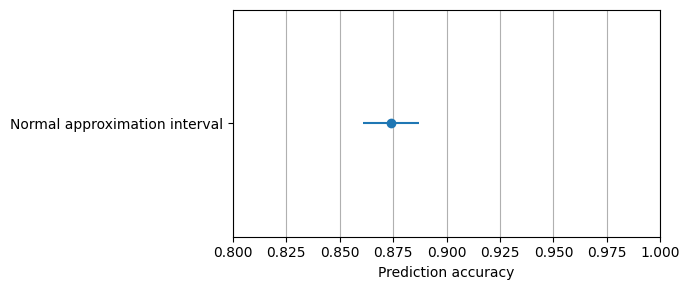

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 3))

ax.errorbar(acc_test, 0, xerr=ci_length, fmt="o")

ax.set_xlim([0.8, 1.0])

ax.set_yticks(np.arange(1))
ax.set_yticklabels(["Normal approximation interval"])
ax.set_xlabel("Prediction accuracy")

plt.tight_layout()
plt.grid(axis="x")
#plt.savefig("matplotlib-figures/normal-approx.pdf")
plt.show()

<li style="color:blue; font-style:italic;">Lastly, let’s store our confidence interval in a Python dictionary so that we can retrieve it later when we compare it to other confidence intervals:</li>

In [55]:
results = {
    "Method 1: Normal approximation": {
        "Test accuracy": acc_test,
        "Lower 95% CI": ci_lower,
        "Upper 95% CI": ci_upper,
    }
}

<h2>III. Deploy</h2>

In [56]:
logistic_model.fit(df[features], df["purchase"].values)
dump(logistic_model, os.path.join(base_dir, 'models/my_model.pkl'))

FileNotFoundError: [Errno 2] No such file or directory: '.\\models/my_model.pkl'